# Importing the Libraries and the Data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from tensorflow.keras.utils import plot_model

In [2]:
xls = pd.ExcelFile(r"C:\Users\rishi\Downloads\kashmir.xlsx")
df1 = pd.read_excel(xls, 'dados')

In [3]:
df1=df1.fillna(value=0)

In [4]:
df1.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Intermediate (PT15_303),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Ballast (PT12_304),Unnamed: 21,Unnamed: 22,Unnamed: 23
0,0.0,Full (PT18_307),0.000000,0.0,Intermediate (PT15_303),0.000000,0.0,Ballast (PT12_304),0.000000,0.0,...,0.0,Log,0.000000,Froude,0.000000,0.0,Log,0.000000,Froude,0.000000
1,0.0,Filtered Signal,0.000000,0.0,Filtered Signal,0.000000,0.0,Filtered Signal,0.000000,0.0,...,0.0,Generated Signal,0.000000,Generated Signal,0.000000,0.0,Generated Signal,0.000000,Generated Signal,0.000000
2,0.0,0,-0.136736,0.0,0,0.048484,0.0,0,-0.121954,0.0,...,0.0,2662.2522,15.825630,2662.2522,15.825630,0.0,1666.9614,13.896367,1666.9614,13.896367
3,0.0,0.334664,-0.136736,0.0,0.334664,0.051535,0.0,0.334664,-0.127369,0.0,...,0.0,2662.253964,15.825626,2662.253964,15.825626,0.0,1666.963164,13.896362,1666.963164,13.896362
4,0.0,0.669328,-0.138823,0.0,0.669328,0.053764,0.0,0.669328,-0.127852,0.0,...,0.0,2662.255729,15.825612,2662.255729,15.825612,0.0,1666.964929,13.896350,1666.964929,13.896350
5,0.0,1.003992,-0.138395,0.0,1.003992,0.057449,0.0,1.003992,-0.126684,0.0,...,0.0,2662.257493,15.825588,2662.257493,15.825588,0.0,1666.966693,13.896329,1666.966693,13.896329
6,0.0,1.338656,-0.140910,0.0,1.338656,0.054229,0.0,1.338656,-0.113466,0.0,...,0.0,2662.259258,15.825556,2662.259258,15.825556,0.0,1666.968458,13.896299,1666.968458,13.896299
7,0.0,1.67332,-0.138047,0.0,1.67332,0.058439,0.0,1.67332,-0.105169,0.0,...,0.0,2662.261022,15.825513,2662.261022,15.825513,0.0,1666.970222,13.896262,1666.970222,13.896262
8,0.0,2.007984,-0.137503,0.0,2.007984,0.057226,0.0,2.007984,-0.090906,0.0,...,0.0,2662.262786,15.825462,2662.262786,15.825462,0.0,1666.971986,13.896215,1666.971986,13.896215
9,0.0,2.342648,-0.131383,0.0,2.342648,0.060491,0.0,2.342648,-0.086820,0.0,...,0.0,2662.264551,15.825401,2662.264551,15.825401,0.0,1666.973751,13.896161,1666.973751,13.896161


# Splliting Data Based on Different Type

In [5]:
X_train_Full=df1.iloc[3:16536,[1,2]]
Y_train_Full=df1.iloc[3:16536,[10]]

X_train_Blast=df1.iloc[3:7185,[7,8]]
Y_train_Blast=df1.iloc[3:7185,[20]]

X_train_Intermediate=df1.iloc[3:15024,[4,5]]
Y_train_Intermediate=df1.iloc[3:15024,[15]]

In [6]:
X_train_Full=np.array(X_train_Full).astype(np.float64)
Y_train_Full=np.array(Y_train_Full).astype(np.float64)

X_train_Blast=np.array(X_train_Blast).astype(np.float64)
Y_train_Blast=np.array(Y_train_Blast).astype(np.float64)

X_train_Intermediate=np.array(X_train_Intermediate).astype(np.float64)
Y_train_Intermediate=np.array(Y_train_Intermediate).astype(np.float64)

# Scaling The Data Points

In [7]:

SS_Full_Output=StandardScaler()

SS_Blast_Output=StandardScaler()

SS_Intermediate_Output=StandardScaler()

In [8]:
#X_train_Full=SS_Full_Input.fit_transform(X_train_Full)
Y_train_Full=SS_Full_Output.fit_transform(Y_train_Full)

Y_train_Blast=SS_Blast_Output.fit_transform(Y_train_Blast)

#X_train_Intermediate=SS_Intermediate_Input.fit_transform(X_train_Intermediate)
Y_train_Intermediate=SS_Intermediate_Output.fit_transform(Y_train_Intermediate)

# Intermediate

## Defining the model

In [9]:
Intermediate_Model=Sequential()
Intermediate_Model.add(Dense(30,activation='relu',input_shape=(2,)))
Intermediate_Model.add(Dense(30,activation='relu'))
Intermediate_Model.add(Dense(18,activation='relu'))
Intermediate_Model.add(Dense(30,activation='relu'))
Intermediate_Model.add(Dense(1))

## Compiling the model 

In [15]:
Intermediate_Model.compile(optimizer='adam',loss='mse',metrics=['mse'])
plot_model(Intermediate_Model, to_file='Intermediate_model_architecture.jpg', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training the model

In [11]:
History_Intermediate=Intermediate_Model.fit(X_train_Intermediate,Y_train_Intermediate,epochs=40,batch_size=32)

Epoch 1/40
470/470 [==============================] - 2s 2ms/step - loss: 3.2040 - mse: 3.2040
Epoch 2/40
470/470 [==============================] - 1s 2ms/step - loss: 0.2201 - mse: 0.2201
Epoch 3/40
470/470 [==============================] - 1s 2ms/step - loss: 0.1036 - mse: 0.1036
Epoch 4/40
470/470 [==============================] - 1s 2ms/step - loss: 0.7154 - mse: 0.7154
Epoch 5/40
470/470 [==============================] - 1s 2ms/step - loss: 0.4408 - mse: 0.4408
Epoch 6/40
470/470 [==============================] - 1s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 7/40
470/470 [==============================] - 1s 2ms/step - loss: 1.2010 - mse: 1.2010
Epoch 8/40
470/470 [==============================] - 1s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 9/40
470/470 [==============================] - 1s 2ms/step - loss: 0.0017 - mse: 0.0017
Epoch 10/40
470/470 [==============================] - 1s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 11/40
470/470 [============================

## Checkin the accuracy

In [12]:
r2_score(Y_train_Intermediate,Intermediate_Model.predict(X_train_Intermediate))

470/470 [==============================] - 1s 2ms/step


0.9990231360748605

## Plots

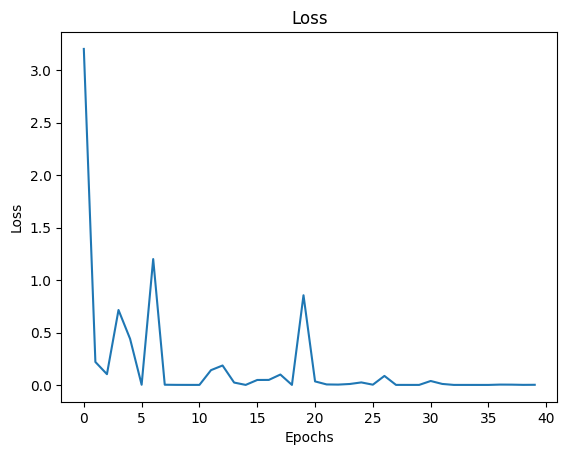

In [13]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(History_Intermediate.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Loss_Intermediate.png')
plt.show()

470/470 [==============================] - 1s 1ms/step


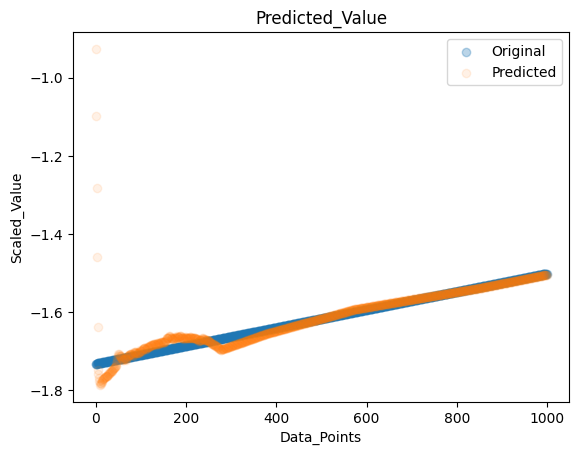

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Predicted_Value')
plt.scatter([i for i in range(1000)],Y_train_Intermediate[:1000],alpha=0.3,label='Original')
plt.scatter([i for i in range(1000)],Intermediate_Model.predict(X_train_Intermediate)[:1000],alpha=0.1,label='Predicted')
plt.xlabel('Data_Points')
plt.ylabel('Scaled_Value')
plt.legend()
plt.savefig('Prediction_Original_Intermediate.png')
plt.show()

In [15]:
Original_Intermediate=SS_Intermediate_Output.inverse_transform(Y_train_Intermediate)
Output_Intermediate=SS_Intermediate_Output.inverse_transform(Intermediate_Model.predict(X_train_Intermediate))

470/470 [==============================] - 1s 2ms/step


In [16]:
Intermediate_Output={'Frode_Number_Original':Original_Intermediate[:,0],'Frode_Number_Predicted':Output_Intermediate[:,0]}

In [17]:
pd.DataFrame(Intermediate_Output)

,Frode_Number_Original,Frode_Number_Predicted
0,2662.253964,2668.416260
1,2662.255729,2667.102051
2,2662.257493,2665.683838
3,2662.259258,2664.336426
4,2662.261022,2662.979736
...,...,...
15016,2688.748195,2688.641846
15017,2688.749959,2688.643555
15018,2688.751724,2688.645264
15019,2688.753488,2669.959717


# Full

## Creating the model

In [18]:
Full_Model=Sequential()
Full_Model.add(Dense(30,activation='relu',input_shape=(2,)))
Full_Model.add(Dense(30,activation='relu'))
Full_Model.add(Dense(18,activation='relu'))
Full_Model.add(Dense(30,activation='relu'))
Full_Model.add(Dense(1))

## Compiling the model 

In [19]:
Full_Model.compile(optimizer='adam',loss='mse',metrics=['mse'])
plot_model(Full_Model, to_file='Full_model_architecture.png', show_shapes=True, show_layer_names=True)

## Training the model

In [36]:
History_Full=Full_Model.fit(X_train_Full,Y_train_Full,epochs=80,batch_size=32) #40

Epoch 1/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2689 - mse: 0.2689
Epoch 2/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2747 - mse: 0.2747
Epoch 3/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2324 - mse: 0.2324
Epoch 4/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2373 - mse: 0.2373
Epoch 5/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2381 - mse: 0.2381
Epoch 6/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2303 - mse: 0.2303
Epoch 7/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2216 - mse: 0.2216
Epoch 8/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2085 - mse: 0.2085
Epoch 9/40
517/517 [==============================] - 1s 2ms/step - loss: 0.2232 - mse: 0.2232
Epoch 10/40
517/517 [==============================] - 1s 2ms/step - loss: 0.1841 - mse: 0.1841
Epoch 11/40
517/517 [============================

## Evaluating the Model

In [37]:
r2_score(Y_train_Full,Full_Model.predict(X_train_Full))

517/517 [==============================] - 1s 2ms/step


0.9673381471901322

## Plots

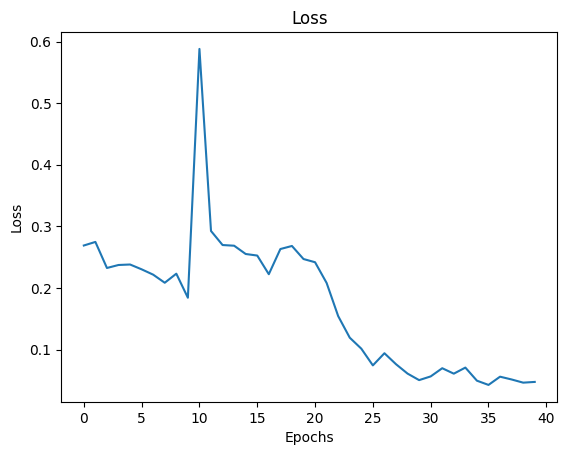

In [38]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(History_Full.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Loss_Full.png')
plt.show()

517/517 [==============================] - 1s 2ms/step


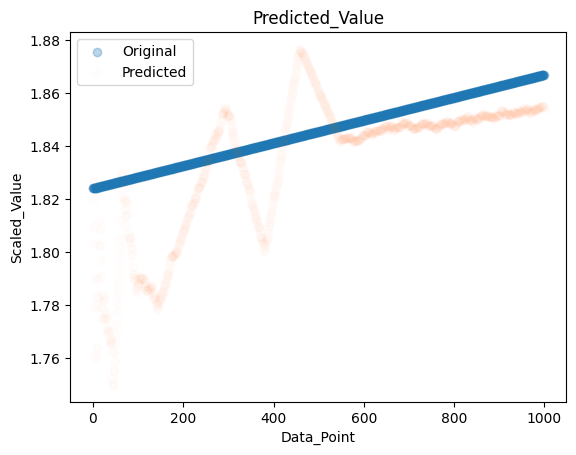

In [39]:
plt.figure()
plt.title('Predicted_Value')
plt.scatter([i for i in range(1000)],Y_train_Full[:1000],alpha=0.3,label='Original')
plt.scatter([i for i in range(1000)],Full_Model.predict(X_train_Full)[:1000],alpha=0.01,label='Predicted')
plt.xlabel('Data_Point')
plt.ylabel('Scaled_Value')
plt.legend()
plt.savefig('Prediction_Original_Full.png')
plt.show()

In [40]:
Original_Full=SS_Full_Output.inverse_transform(Y_train_Full)
Output_Full=SS_Full_Output.inverse_transform(Full_Model.predict(X_train_Full))

517/517 [==============================] - 1s 1ms/step


In [41]:
Full_Output={'Frode_Number_Original':Original_Full[1:10,0],'Frode_Number_Predicted':Output_Full[1:10,0]}

In [42]:
pd.DataFrame(Full_Output)

,Frode_Number_Original,Frode_Number_Predicted
0,2740.9982,2736.001221
1,2741.0482,2724.030273
2,2741.0982,2716.917236
3,2741.1482,2700.924316
4,2741.1982,2688.313232
5,2741.2482,2666.531250
6,2741.2982,2668.345215
7,2741.3482,2670.601318
8,2741.3982,2689.620850


# Blast

## Creating the Model

In [27]:
Blast_Model=Sequential()
Blast_Model.add(Dense(30,activation='relu',input_shape=(2,)))
Blast_Model.add(Dense(30,activation='relu'))
Blast_Model.add(Dense(18,activation='relu'))
Blast_Model.add(Dense(30,activation='relu'))
Blast_Model.add(Dense(1))

## Compiling the model

In [28]:
Blast_Model.compile(optimizer='adam',loss='mse',metrics=['mse'])
plot_model(Blast_Model, to_file='Blast_model_architecture.png', show_shapes=True, show_layer_names=True)

## Trainig the model

In [29]:
History_Blast=Blast_Model.fit(X_train_Blast,Y_train_Blast,epochs=10,batch_size=32) 

Epoch 1/10
225/225 [==============================] - 1s 2ms/step - loss: 437.2871 - mse: 437.2871
Epoch 2/10
225/225 [==============================] - 0s 2ms/step - loss: 0.6605 - mse: 0.6605
Epoch 3/10
225/225 [==============================] - 0s 2ms/step - loss: 0.3891 - mse: 0.3891
Epoch 4/10
225/225 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.1574
Epoch 5/10
225/225 [==============================] - 0s 2ms/step - loss: 0.0628 - mse: 0.0628
Epoch 6/10
225/225 [==============================] - 0s 2ms/step - loss: 0.0301 - mse: 0.0301
Epoch 7/10
225/225 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147
Epoch 8/10
225/225 [==============================] - 0s 2ms/step - loss: 0.0080 - mse: 0.0080
Epoch 9/10
225/225 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 10/10
225/225 [==============================] - 0s 2ms/step - loss: 0.0051 - mse: 0.0051


## Evaluating the model

In [30]:
r2_score(Y_train_Blast,Blast_Model.predict(X_train_Blast))

225/225 [==============================] - 0s 2ms/step


0.9962033782216511

## Plots

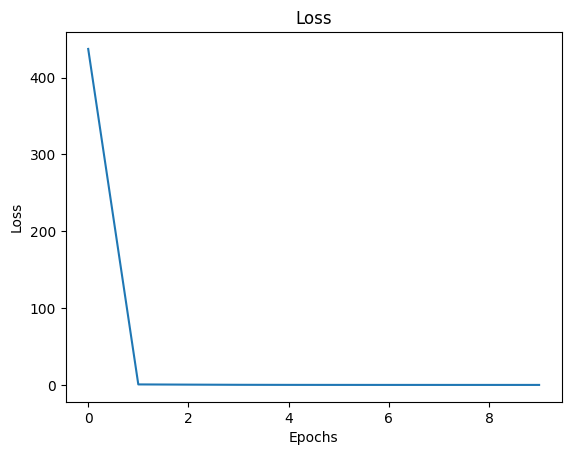

In [31]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(History_Blast.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Loss_Blast.png')
plt.show()

225/225 [==============================] - 0s 2ms/step


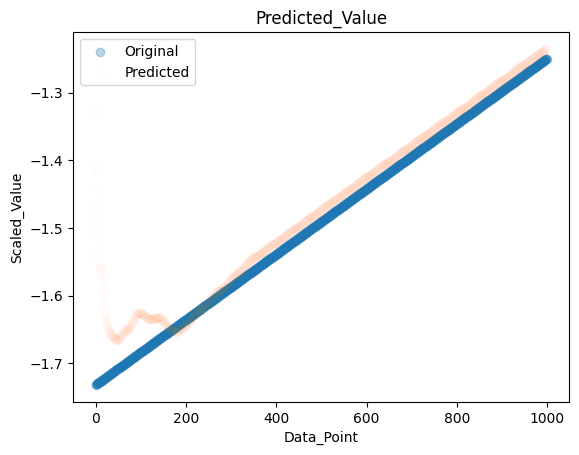

In [32]:
plt.figure()
plt.title('Predicted_Value')
plt.scatter([i for i in range(1000)],Y_train_Blast[:1000],alpha=0.3,label='Original')
plt.scatter([i for i in range(1000)],Blast_Model.predict(X_train_Blast)[:1000],alpha=0.01,label='Predicted')
plt.xlabel('Data_Point')
plt.ylabel('Scaled_Value')
plt.legend()
plt.savefig('Prediction_Original_Blast.png')
plt.show()

In [33]:
Original_Blast=SS_Blast_Output.inverse_transform(Y_train_Blast)
Output_Blast=SS_Blast_Output.inverse_transform(Blast_Model.predict(X_train_Blast))

225/225 [==============================] - 0s 2ms/step


In [34]:
Blast_Output={'Frode_Number_Original':Original_Blast[1:10,0],'Frode_Number_Predicted':Output_Blast[1:10,0]}

In [35]:
pd.DataFrame(Blast_Output)

,Frode_Number_Original,Frode_Number_Predicted
0,1666.964929,1668.122192
1,1666.966693,1668.020630
2,1666.968458,1667.937256
3,1666.970222,1667.880859
4,1666.971986,1667.821777
5,1666.973751,1667.760864
6,1666.975515,1667.697144
7,1666.977280,1667.636597
8,1666.979044,1667.607422
